### Spotify Şarkı Türü Sınıflandırması – Veri Ön İşleme Aşaması

Bu projede amaç, Spotify şarkı verileri üzerinden şarkıların ait olduğu müzik türlerini (genre) tahmin etmeye yönelik bir makine öğrenmesi modeli geliştirmektir.

Bu aşamada, model eğitimine geçmeden önce sadece veri ön işleme adımları ele alınmıştır

Kütüphanelerimizi import ederek başlıyoruz.

In [484]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [485]:
df = pd.read_csv("SpotifyFeatures.csv")

In [486]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


SpotifyFeatures.csv adlı ham veri seti kullanıldı.

Bu veri seti; danceability, energy, tempo, valence, acousticness, instrumentalness, liveness, speechiness, gibi şarkılara ait sayısal özellikler içermektedir.

Ayrıca her şarkıya ait bir genre (müzik türü) bilgisi bulunmaktadır.

In [488]:
df = df.drop(columns = ["artist_name", "track_name", "track_id"])

#### Gereksiz Sütunların Kaldırılması
Analiz veya model için anlamlı olmayan track_id, track_name, artist_name, gibi sütunlar veri setinden çıkarılmıştır.

#### Label Encoding

Label encoding, kategorik verileri sayısal değerlere dönüştürme yöntemidir. Her kategoriye benzersiz bir tam sayı atanır. Böylece makine öğrenmesi algoritmaları bu veriyi kullanabilir. 

In [491]:
df['mode'] = df['mode'].map({'Major':1, 'Minor':0})

'mode' sütunundaki kategorik veriler sayısal forma dönüştürüldü.
'Major' 1 olarak, 'Minor' ise 0 olarak kodlandı. Bu sayede modelin anlayabileceği ikili (binary) bir format elde edildi.

In [493]:
df['key'] = df['key'].astype('category').cat.codes

'key' sütunu kategorik veri tipine çevrildi ve her kategoriye sayısal bir kod atandı.
Bu dönüşüm sayesinde modelin işleyebileceği sayısal format elde edildi (örneğin: C = 0, D = 1, E = 2 ...).

In [495]:
df['time_signature'].unique()

array(['4/4', '5/4', '3/4', '1/4', '0/4'], dtype=object)

time_signature sütununda kaç farklı ritim türü olduğunu görmek için kullanıyoruz. 
Mesela 3/4, 4/4 gibi farklı ritim kalıplarını listeleyip, veri setindeki çeşitliliği anlamamıza yardımcı oluyor.

In [497]:
df = df[df['time_signature'] != 0] 

time_signature sütununda değeri 0 olan kayıtlar veri setinde anlamsız ya da hatalı olabilir, onları tamamen çıkardık. Böylece sadece geçerli ve doğru ritim bilgisi olan şarkılarla çalışacağız

In [499]:
df['time_signature'] = df['time_signature'].apply(lambda x: int(str(x).split('/')[0]))

time_signature sütunundaki ritim bilgisini sadece sayı olarak aldık.

#### Label Encoder

Label Encoder, kategorik verileri (yani yazıyla ifade edilen grupları) makine öğrenmesi modellerinin anlayacağı sayılara dönüştüren bir araçtır. Mesela müzik türleri “rock”, “pop”, “jazz” gibi metinlerdir. Label Encoder bunları sırasıyla 0, 1, 2 gibi sayılara çevirir. Böylece model, “rock”ı anlamaya çalışmak yerine sadece rakamlarla işlem yapar ve çok daha hızlı öğrenir.

In [502]:
from sklearn.preprocessing import LabelEncoder

In [503]:
le = LabelEncoder() # encoder nesnesi oluşturuyoruz
df['genre_encoded'] = le.fit_transform(df['genre'])
# genre sütununu sayısal hedefe dönüştürdük

In [504]:
df.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_encoded
0,Movie,0,0.611,0.389,99373,0.910,0.000,4,0.3460,-1.828,1,0.0525,166.969,4,0.814,15
1,Movie,1,0.246,0.590,137373,0.737,0.000,9,0.1510,-5.559,0,0.0868,174.003,4,0.816,15
2,Movie,3,0.952,0.663,170267,0.131,0.000,3,0.1030,-13.879,0,0.0362,99.488,5,0.368,15
3,Movie,0,0.703,0.240,152427,0.326,0.000,4,0.0985,-12.178,1,0.0395,171.758,4,0.227,15
4,Movie,4,0.950,0.331,82625,0.225,0.123,8,0.2020,-21.150,1,0.0456,140.576,4,0.390,15


In [505]:
df.isnull().sum()

genre               0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
genre_encoded       0
dtype: int64

Sonuçta gördüğümüz gibi, tüm sütunlarda eksik veri sayısı 0 
yani veri setinde boş, eksik ya da kayıp veri yok.

In [507]:
df.dtypes

genre                object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                    int8
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
genre_encoded         int64
dtype: object

Veri tipleri genel olarak doğru ve tutarlı; sayısal özellikler sayısal, kategorik olanlar (genre) metin olarak uygun biçimde.

In [509]:
df.describe()


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_encoded
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,5.344467,0.215009,-9.569885,0.652031,0.120765,117.666585,3.885148,0.454917,13.623324
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,3.461641,0.198273,5.998204,0.476327,0.185518,30.898907,0.462955,0.260065,7.491245
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.000000,0.009670,-52.457000,0.000000,0.022200,30.379000,0.000000,0.000000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,3.000000,0.097400,-11.771000,0.000000,0.036700,92.959000,4.000000,0.237000,7.000000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,5.000000,0.128000,-7.762000,1.000000,0.050100,115.778000,4.000000,0.444000,14.000000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,8.000000,0.264000,-5.501000,1.000000,0.105000,139.054000,4.000000,0.660000,20.000000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,11.000000,1.000000,3.744000,1.000000,0.967000,242.903000,5.000000,1.000000,26.000000


popularity: Ortalama 41, en popüler şarkı 100, en düşük 0 — popülerlik dağılımı dengeli gibi.

acousticness: Ortalama 0.37, bazı şarkılar tamamen akustik (1'e yakın), bazıları hiç değil (0’a yakın).

danceability: Ortalama 0.55, dans edilebilirlik çoğunlukla orta seviyede.

duration_ms: Şarkı süreleri çok değişken; en kısa 15 saniye, en uzun 1.5 saat gibi (istisnai uzunluklar olabilir, temizlemek gerekebilir).Kontrol edildi çok uzun ve çok kısa şarkı bulunamadı.

energy: Ortalama 0.57, enerjisi yüksek ve düşük şarkılar karışık.

key: 0-11 arasında kodlanmış (12 müzik notası), dağılım dengeli.

loudness: Ortalama -9.5 dB, min -52 dB (çok sessiz), max 3.7 dB (çok yüksek) — standart müzik seviyeleri.

mode: %65 majör (1), %35 minör (0) diyebiliriz.

tempo: Ortalama 117 bpm, tempo çok geniş aralıkta.

time_signature: Genelde 4/4 (4), bazı varyasyonlar var (3,5 gibi).

valence: Ortalama 0.45, duygusal tat ortada (ne çok mutlu ne çok hüzünlü).

genre_encoded: 0-26 arasında sınıflar, 27 tür var demek

In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   popularity        232725 non-null  int64  
 2   acousticness      232725 non-null  float64
 3   danceability      232725 non-null  float64
 4   duration_ms       232725 non-null  int64  
 5   energy            232725 non-null  float64
 6   instrumentalness  232725 non-null  float64
 7   key               232725 non-null  int8   
 8   liveness          232725 non-null  float64
 9   loudness          232725 non-null  float64
 10  mode              232725 non-null  int64  
 11  speechiness       232725 non-null  float64
 12  tempo             232725 non-null  float64
 13  time_signature    232725 non-null  int64  
 14  valence           232725 non-null  float64
 15  genre_encoded     232725 non-null  int64  
dtypes: float64(9), int64

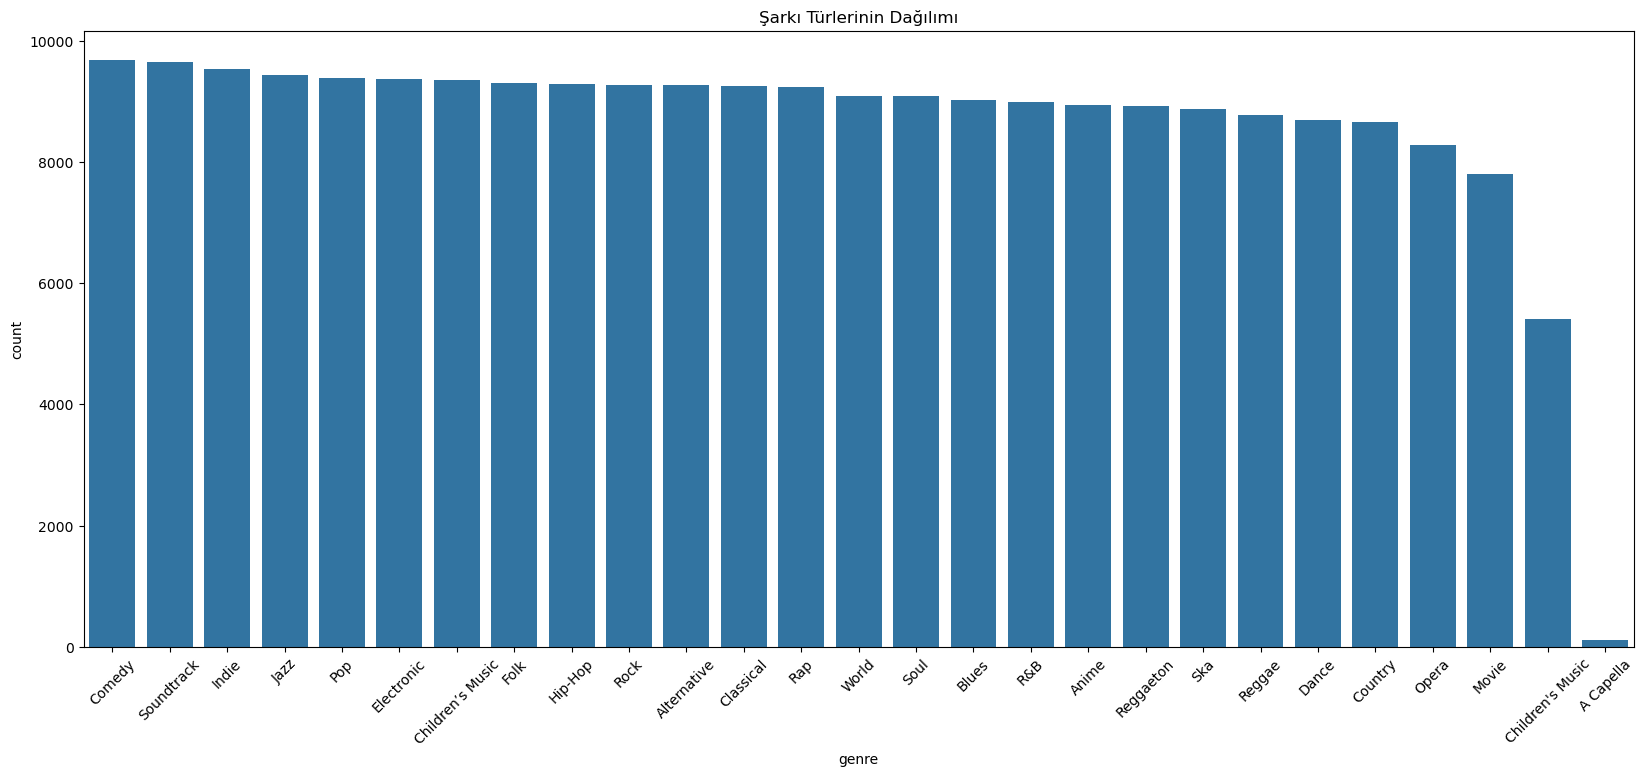

In [512]:
plt.figure(figsize=(20,8))
sns.countplot(x='genre', data=df, order=df['genre'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Şarkı Türlerinin Dağılımı")
plt.show()

Bu grafik, şarkı türlerinin veri setindeki dağılımını gösteren bir çubuk grafik (bar chart). Yani elimizdeki müzik verisinde kaç tane pop, rock, jazz gibi türlerden şarkı olduğunu sayıyor ve türlere göre çubuklar çiziyor.

Grafikte türler en çoktan en aza doğru sıralanıyor, böylece hangi türün en yaygın, hangisinin daha az olduğunu kolayca görebiliyoruz.

Bazı türlerin veri setinde çok fazla, bazı türlerin ise çok az sayıda örneği var.

Bu dengesizlik, model eğitirken önemli bir faktör çünkü az olan türlerin tahmini zorlaşabilir.

Grafikte türler arasında A Capella’nın çok az sayıda şarkı ile temsil edildiğini fark ediyoruz. Bu türün örnek sayısının düşük olması, modelin bu türü öğrenmesini zorlaştırabilir. 

Ayrıca veri setinde Children's Music türü iki farklı şekilde yazılmış:
biri 'Children's Music' diğeri ise 'Children’s Music'.
Aralarındaki fark, tırnak işaretlerinin (apostrof) biri düz ' iken diğeri tipografik ’ karakteri olmasıdır.

Bu tür ufak yazım farkları, veri temizliği yapılmadığında aynı kategoriye ait verilerin farklı kategoriler gibi algılanmasına yol açar. Sonuçta model için bu iki farklı tür gibi görünür, oysa aslında aynı kategori.

Bu da veri tutarlılığı ve model başarısı için mutlaka düzeltilmesi gereken küçük ama önemli bir sorun.

In [514]:
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [515]:
df['genre'] = df['genre'].replace("Children’s Music", "Children's Music")

replace() fonksiyonu ile bu farklılığı giderip, aynı türü tek bir kategori altında topladık. Böylece veri tutarlılığını sağladık ve model için daha sağlıklı bir veri hazırladık

In [517]:
df['genre_encoded'].value_counts()

genre_encoded
7     9681
25    9646
13    9543
14    9441
17    9386
10    9377
5     9353
11    9299
12    9295
22    9272
1     9263
6     9256
19    9232
26    9096
24    9089
3     9023
18    8992
2     8936
21    8927
23    8874
20    8771
9     8701
8     8664
16    8280
15    7806
4     5403
0      119
Name: count, dtype: int64

In [518]:
df[df['genre_encoded'] == 0]['genre'].unique()


array(['A Capella'], dtype=object)

In [519]:
df = df[df['genre_encoded'] != 0]


In [520]:
df.reset_index(drop=True, inplace=True)


Çok az sayıda örneğe sahip olan 'genre_encoded' değeri 0 olan A Capella türü verisetinden çıkarıldı.

Böylece model eğitiminde dengesizliğin ve aşırı küçük sınıfın yaratabileceği olumsuz etkiler azaltıldı.

Veri indeksi sıfırlandı, böylece sonraki işlemlerde indeks karışıklığı önlendi.

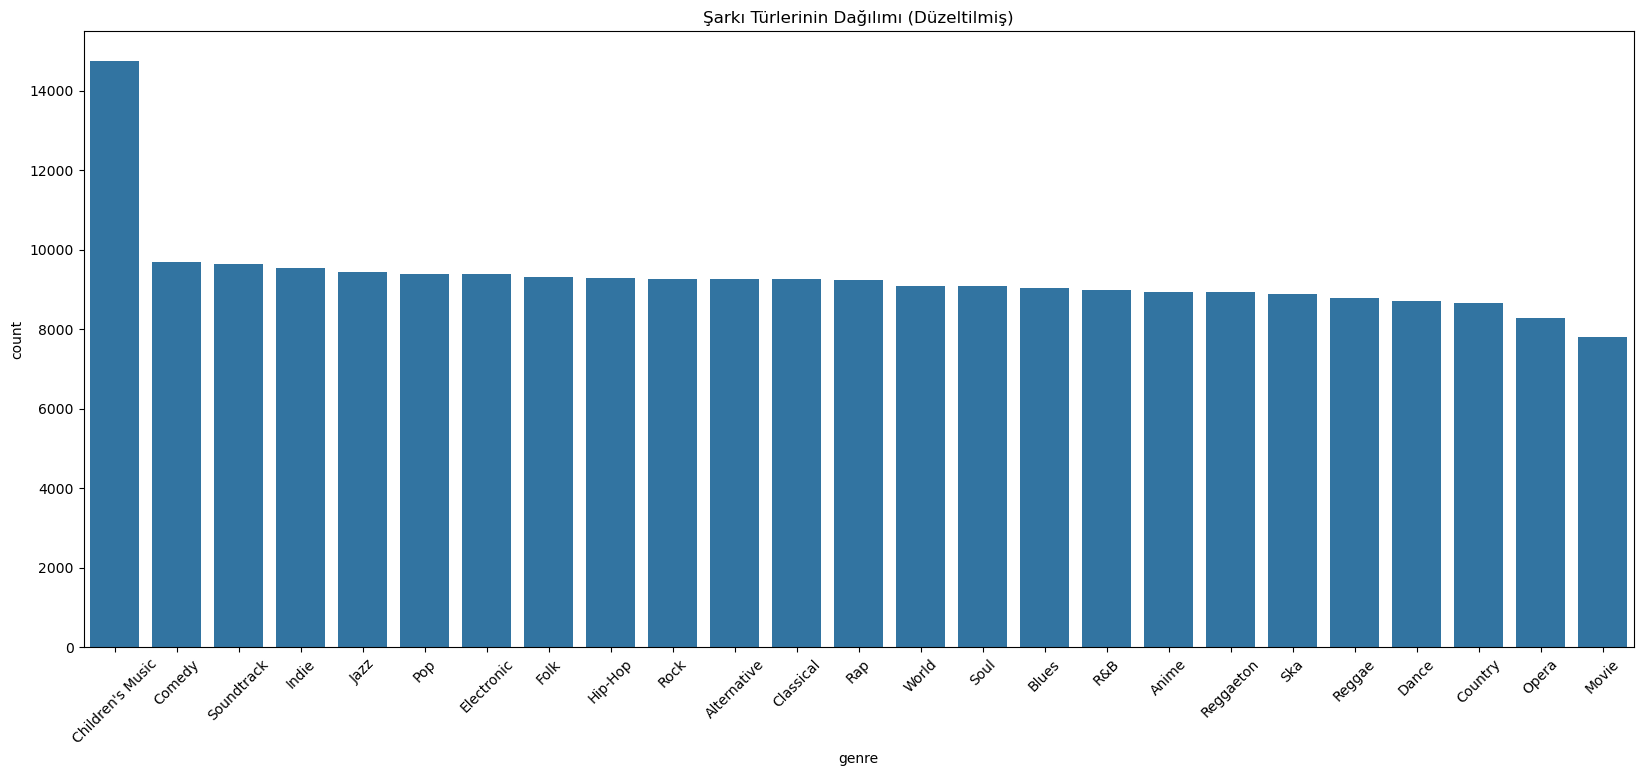

In [522]:
plt.figure(figsize=(20,8))
sns.countplot(x='genre', data=df, order=df['genre'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Şarkı Türlerinin Dağılımı (Düzeltilmiş)")
plt.show()

In [523]:
unique_genres = sorted(df['genre'].unique())
print(unique_genres)

['Alternative', 'Anime', 'Blues', "Children's Music", 'Classical', 'Comedy', 'Country', 'Dance', 'Electronic', 'Folk', 'Hip-Hop', 'Indie', 'Jazz', 'Movie', 'Opera', 'Pop', 'R&B', 'Rap', 'Reggae', 'Reggaeton', 'Rock', 'Ska', 'Soul', 'Soundtrack', 'World']


Veri setindeki tüm benzersiz müzik türlerini alfabetik sırayla listeledik.
Amaç, aynı türlerin farklı yazımlarını veya gözden kaçan türleri tespit etmek.

### Özellikler Arası Korelasyon Matrisi ve Isı Haritası: Değişkenlerin Birbirleriyle İlişkisini Görselleştirme

Bu grafik, veri setimizdeki sayısal özellikler arasındaki korelasyon (ilişki) değerlerini gösteren bir ısı haritasıdır.

Korelasyon, iki değişken arasındaki doğrusal ilişkiyi ölçer; +1 tam pozitif, -1 tam negatif, 0 ise ilişkisiz anlamına gelir.

Haritada renkler, korelasyonun yönünü ve şiddetini temsil eder:

Kırmızı tonlar pozitif korelasyonu,

Mavi tonlar negatif korelasyonu ifade eder.

Matris üzerinde sayısal değerler de gösterilerek, hangi özelliklerin birbirine ne kadar bağlı olduğu kolayca okunabilir.

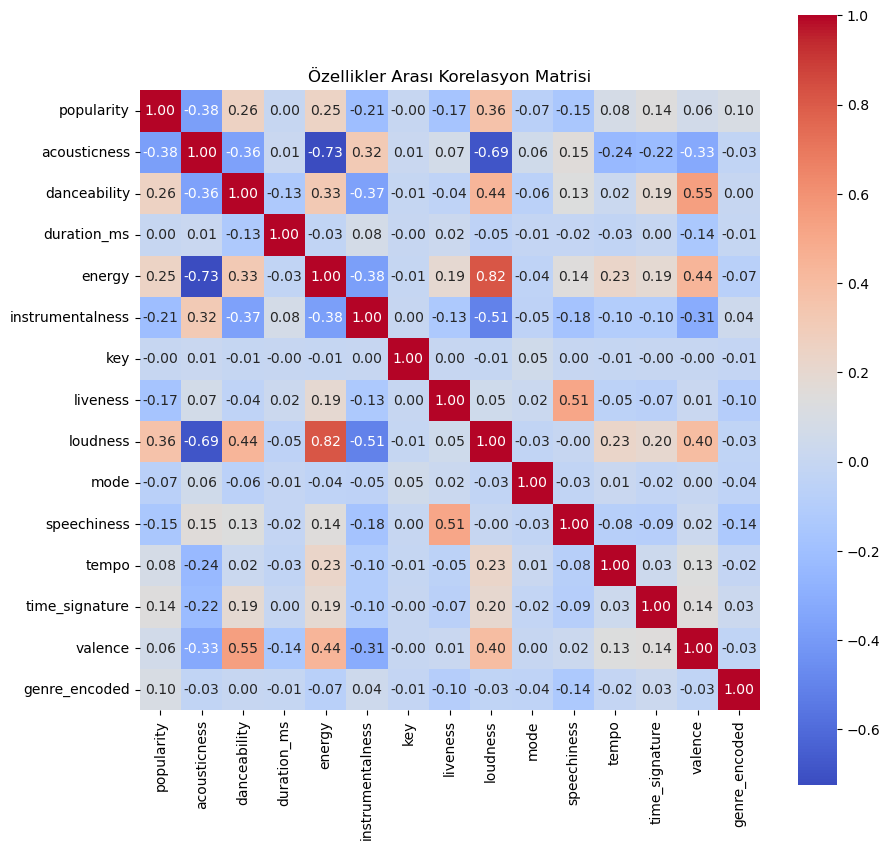

In [526]:
# Özellikler arasındaki korelasyon matrisi ve ısı haritası
plt.figure(figsize=(10,10))
corr = df.corr(numeric_only=True)  # pandas 1.5+ sürümlerde numeric_only parametresi var
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Özellikler Arası Korelasyon Matrisi")
plt.show()




Energy ve Loudness (0.81):
Çok güçlü pozitif korelasyon. Yani enerji arttıkça loudness (ses yüksekliği) da artıyor.
Mantıklı çünkü yüksek enerjili parçalar genelde daha yüksek sesle çalar.

Energy ve Acousticness (-0.72):
Güçlü negatif korelasyon. Acousticness, parçanın ne kadar akustik olduğunu gösterir (yani elektronik değil, doğal enstrümanlı).
Enerji arttıkça akustiklik düşüyor, yani enerjik parçalar genelde elektronik veya daha hareketli,
doğal olmayan seslere sahip.

Acousticness ve Loudness (-0.69):
Orta-yüksek negatif korelasyon. Yüksek akustiklik genelde daha düşük ses yüksekliğiyle (loudness) geliyor. 
Akustik parçalar genelde daha sakin, doğal, yumuşak.

Valence ve Mode (0):
Hiç korelasyon yok. Valence, parçanın ne kadar pozitif, neşeli olduğunu ölçer.
Mode ise majör (1) veya minör (0) olması. Beklendiği gibi; bir parçanın majör ya da minör olması doğrudan mutluluk seviyesiyle bağdaşmıyor.
Bu da müzikte karmaşıklığı gösterir, çünkü mutluluk sadece modla belirlenmez.

In [528]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_encoded
count,232606.000000,232606.000000,232606.000000,2.326060e+05,232606.000000,232606.000000,232606.000000,232606.000000,232606.000000,232606.000000,232606.000000,232606.000000,232606.000000,232606.000000,232606.000000
mean,41.143784,0.368324,0.554437,2.351380e+05,0.571122,0.148373,5.344398,0.215049,-9.567793,0.651991,0.120805,117.669730,3.885214,0.454981,13.630293
std,18.179484,0.354682,0.185584,1.189604e+05,0.263385,0.302828,3.461612,0.198310,5.997774,0.476340,0.185557,30.899342,0.462730,0.260053,7.486820
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.000000,0.009670,-52.457000,0.000000,0.022200,30.379000,0.000000,0.000000,1.000000
25%,29.000000,0.037500,0.435000,1.828670e+05,0.386000,0.000000,3.000000,0.097400,-11.767000,0.000000,0.036700,92.960000,4.000000,0.237000,7.000000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,5.000000,0.128000,-7.760000,1.000000,0.050100,115.780000,4.000000,0.444000,14.000000
75%,55.000000,0.722000,0.692000,2.658000e+05,0.787000,0.035900,8.000000,0.264000,-5.501000,1.000000,0.105000,139.063750,4.000000,0.660000,20.000000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,11.000000,1.000000,3.744000,1.000000,0.967000,242.903000,5.000000,1.000000,26.000000


### Normalizasyon

Veri setindeki sayısal özelliklerin farklı ölçeklerde (mesela bazıları 0-100, bazıları 0-1 milyon gibi) olması, bazı makine öğrenmesi algoritmalarının performansını düşürür. Çünkü büyük değerler modelin öğrenme sürecinde daha baskın olabilir.

Min-Max Scaler bunu çözmek için verileri 0 ile 1 arasında sıkıştırır. 

Yani her değer, o sütundaki minimum ve maksimum değer arasına göre ölçeklenir.

In [530]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

continuous_features = ['popularity', 'acousticness', 'danceability', 'duration_ms', 
                       'energy', 'instrumentalness', 'liveness', 'loudness', 
                       'speechiness', 'tempo', 'valence']

df[continuous_features] = scaler.fit_transform(df[continuous_features])


MinMaxScaler() ile bir "ölçekleyici" nesnesi oluşturuyoruz.

continuous_features listesiyle normalizasyon yapmak istediğin sayısal sütunları belirliyoruz.

scaler.fit_transform() metodu bu sütunları alıp, önce min ve max değerlerini öğreniyor (fit), sonra tüm verileri 0-1 aralığına çekiyor (transform).

Son olarak bu normalize edilmiş değerleri tekrar orijinal df' ye yazıyoruz.

In [532]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,genre_encoded
count,232606.000000,232606.000000,232606.000000,232606.000000,232606.000000,232606.000000,232606.000000,232606.000000,232606.000000,232606.000000,232606.000000,232606.000000,232606.000000,232606.000000,232606.000000
mean,0.411438,0.369804,0.533781,0.039684,0.571685,0.148522,5.344398,0.207385,0.763140,0.651991,0.104366,0.410734,3.885214,0.454981,13.630293
std,0.181795,0.356106,0.199103,0.021483,0.263654,0.303131,3.461612,0.200247,0.106720,0.476340,0.196398,0.145392,0.462730,0.260053,7.486820
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.290000,0.037651,0.405643,0.030245,0.386374,0.000000,3.000000,0.088587,0.724008,0.000000,0.015347,0.294466,4.000000,0.237000,7.000000
50%,0.430000,0.232932,0.551550,0.037027,0.605598,0.000044,5.000000,0.119485,0.795306,1.000000,0.029530,0.401842,4.000000,0.444000,14.000000
75%,0.550000,0.724900,0.681365,0.045221,0.787783,0.035936,8.000000,0.256813,0.835501,1.000000,0.087638,0.511400,4.000000,0.660000,20.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,26.000000


#### One-hot Encoding

One-hot encoding, kategorik verileri makine öğrenmesi modellerinin anlayacağı sayısal formata dönüştürmek için kullanılır.

Mesela elimizde time_signature gibi bir özellik var ve bu sütun birkaç farklı kategori (örneğin 3, 4, 5 gibi farklı zaman işaretleri) içeriyor. Model direkt bu sayısal değerleri kullanırsa, aralarında anlamsız bir sıralama ya da büyüklük ilişkisi olduğunu düşünebilir. Halbuki bu kategoriler birbirinden bağımsız, sıralaması olmayan sınıflar.

One-hot encoding ne yapar?

Her kategori için ayrı bir sütun oluşturur.

O satırdaki kategoriye karşılık gelen sütuna 1 koyar, diğer sütunlara 0.

Böylece model her kategoriyi bağımsız, eşit ağırlıklı ve birbirinden ayrı olarak algılar.

Neden yapıyoruz?

Modelin kategorik değişkenlere yanlış anlam yüklemesini engellemek için.

Özellikle karar ağaçları dışındaki çoğu algoritma (örneğin lineer regresyon, lojistik regresyon, sinir ağları) kategorik değişkenlerde bu yöntemi tercih eder.


In [534]:
time_signature_dummies = pd.get_dummies(df['time_signature'], prefix='time_signature')


df = pd.concat([df, time_signature_dummies], axis=1)

df.drop('time_signature', axis=1, inplace=True)

In [535]:
df.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,genre_encoded,time_signature_0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,Movie,0.00,0.613454,0.356292,0.015167,0.910909,0.000000,4,0.339614,0.900856,1,0.032070,0.642704,0.814,15,False,False,False,True,False
1,Movie,0.01,0.246988,0.571934,0.022029,0.737732,0.000000,9,0.142710,0.834469,0,0.068374,0.675801,0.816,15,False,False,False,True,False
2,Movie,0.03,0.955823,0.650252,0.027969,0.131113,0.000000,3,0.094241,0.686429,0,0.014818,0.325182,0.368,15,False,False,False,False,True
3,Movie,0.00,0.705823,0.196438,0.024747,0.326313,0.000000,4,0.089697,0.716695,1,0.018311,0.665238,0.227,15,False,False,False,True,False
4,Movie,0.04,0.953815,0.294067,0.012142,0.225209,0.123123,8,0.194208,0.557054,1,0.024767,0.518516,0.390,15,False,False,False,True,False


In [536]:
df.to_csv("SpotifyFeaturesCleaned.csv", index=False)

Ön işleme aşaması tamamlandı, veri artık modele hazır hale geldi. Şimdi asıl işin başladığı, modelleri eğitip performansları değerlendireceğimiz kısma geçiyoruz.